# Random Forest Assignment

## Dataset - Fraud_check

## Objective:-Use random forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### Importing the important libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv("Fraud_check.csv")

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### Understanding the dataset

In [4]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
#checking of null values and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
#checking of duplicates inside the data
data[data.duplicated(keep = False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [7]:
#We will create numerical variable for categorical data
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 
data['Urban']= label_encoder.fit_transform(data['Urban']) 

In [8]:
#We will take high taxable.income above 30000 beacause it is the average of Taxable.income
data["Taxable.Income"]=(data["Taxable.Income"]>30000)*1

In [9]:
x=data.drop(axis=0,columns="Taxable.Income")
y=data["Taxable.Income"]

In [10]:
data["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [13]:
model = RandomForestClassifier(n_estimators=110, max_features=3)

In [14]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=110)

In [15]:
from sklearn import metrics

In [16]:
Y_pred=model.predict(x_train)

In [17]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 1.0


In [18]:
model.score(x_train, y_train)

1.0

In [19]:
y_pred=model.predict(x_test)

In [20]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7666666666666667


In [21]:
model.score(x_test, y_test)

0.7666666666666667

In [22]:
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

City.Population    0.519003
Work.Experience    0.298401
Marital.Status     0.086493
Urban              0.048524
Undergrad          0.047580
dtype: float64

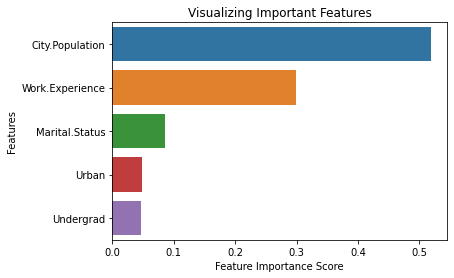

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [24]:
train_accuracy = []
test_accuracy = []
for max_features in range(1,5):
    model=RandomForestClassifier(n_estimators=110, max_features=3)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [25]:
data = pd.DataFrame({'max_features':range(1,5),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.766667
1,2,1.0,0.766667
2,3,1.0,0.794444
3,4,1.0,0.788889


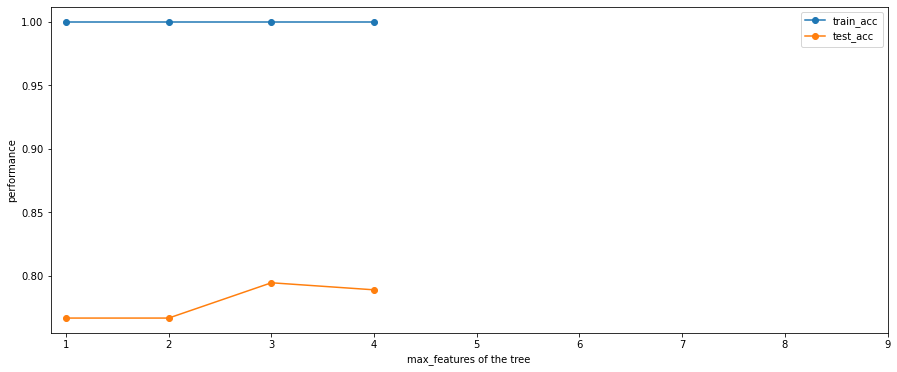

In [26]:
# visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(data['max_features'],data['train_acc'], marker = 'o')
plt.plot(data['max_features'], data['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred) 
cm

array([[  1,  32],
       [ 10, 137]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.7888888888888889')

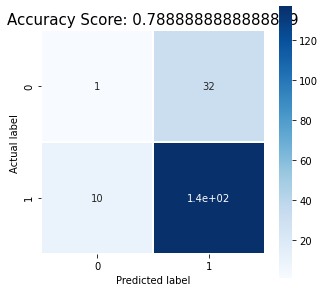

In [28]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [29]:
# Predicting the values of test data
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.14      0.03      0.05        33
           1       0.82      0.96      0.88       147

    accuracy                           0.79       180
   macro avg       0.48      0.49      0.47       180
weighted avg       0.69      0.79      0.73       180



In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [31]:
from sklearn.model_selection import KFold

In [32]:
kfold=KFold(n_splits=8,random_state=7)

C:\Users\tanma\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [33]:
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.7350000000000001


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [35]:
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

C:\Users\tanma\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.7916666666666666


In [36]:
model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=7)

In [37]:
from sklearn import metrics

In [38]:
Y_pred=model.predict(x_train)

In [39]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 0.7833333333333333


In [40]:
model.score(x_train, y_train)

0.7833333333333333

In [41]:
y_pred=model.predict(x_test)

In [42]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.8166666666666667
